# Confidence Intervals

In [1]:
import numpy as np
from scipy import stats
import random
from matplotlib import pyplot as plt
%matplotlib inline

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Before proceeding, let's already say a word about how to _interpret_ a confidence interval.

Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that the true population mean beak length has a 90% chance of being somewhere between 8.6cm and 9.4cm. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

OK: So how do we construct these intervals?

The confidence interval we construct will depend on the statistics of our sample. It will depend in particular on (i) our sample mean and (ii) our sample size.

Naturally, the confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center with a step size equal to the standard error, $\large\frac{\sigma}{\sqrt{n}}$. The number of steps we take is determined by which level of confidence we want attached to our interval: In particular, we take $z$-many steps, where $z$ is the (two-tailed) z-score that corresponds to our chosen level of confidence.

Let's look at an example:

In [2]:
# A normally distributed variable with a
# population size of 1000

pop = list(stats.norm.rvs(size=1000))

In [3]:
# Let's calculate the population mean.

np.mean(pop)

-0.03237412103138391

In [7]:
# And the population standard deviation.

pop_std = np.std(pop)

Let's say we take a sample of ten from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The z-score that corresponds to an 80%-confidence interval is:

In [12]:
conf = stats.norm.ppf(0.95)
#Why do we want 0.9 here?
conf

1.6448536269514722

In [6]:
sample = random.sample(pop, 10)
np.mean(sample)

0.04108852584881957

In [8]:
pop_std / np.sqrt(10) * conf

0.38630307453242996

In [9]:
min_conf = np.mean(pop) - pop_std / np.sqrt(10) * conf
max_conf = np.mean(pop) + pop_std / np.sqrt(10) * conf
min_conf, max_conf

(-0.4186771955638139, 0.35392895350104603)

## A Visual Interpretation of Confidence Intervals

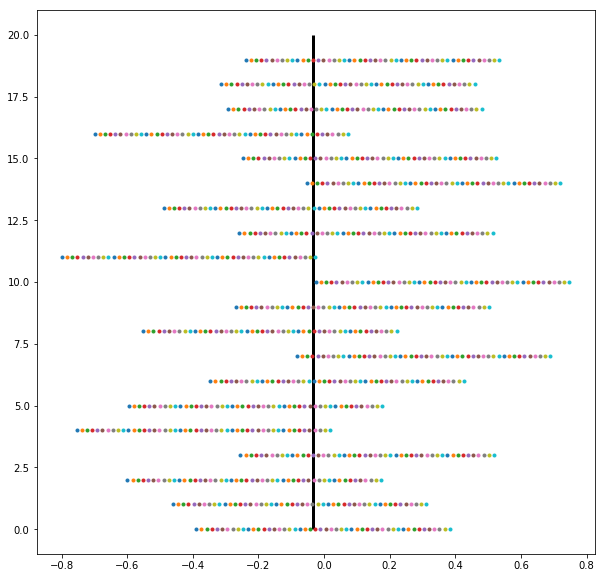

In [10]:
# Plotting CIs

intervals = []
for _ in range(20): # number of intervals
    sample = random.sample(pop, 10) # sample size = 10
    step = np.std(pop) / np.sqrt(10) # standard error
    x_min = np.mean(sample) - step * conf # left endpt. of interval
    x_max = np.mean(sample) + step * conf # right endpt. of interval
    intervals.append(np.linspace(x_min, x_max, 50)) # add interval
                                                    # to intervals
plt.figure(figsize = (10, 10))
plt.plot(intervals, range(20), '.') # plot intervals evenly and
                                    # vertically
plt.vlines(np.mean(pop), 0, 20, lw=3);

In [32]:
# Exercise: turn this into a function that takes as parameters:
# - the population
# - sample size
# - no. of samples / confidence intervals to plot
# - confidence level

def weave_plot(population, sample_size, num_samples, conf_level=0.95):
    pop = list(stats.norm.rvs(size=population)) # generate a random population from user defined population size
    z_sc = stats.norm.ppf(conf_level) # calculate z-score from user defined conf_level
    intervals = []
    for _ in range(num_samples): # number of intervals, defined by user
        sample = random.sample(pop, sample_size) # sample size = user defined sample_size
        step = np.std(pop) / np.sqrt(sample_size) # standard error
        x_min = np.mean(sample) - step * z_sc # left endpt. of interval
        x_max = np.mean(sample) + step * z_sc # right endpt. of interval
        intervals.append(np.linspace(x_min, x_max, 50)) # add interval to intervals
                                                        
    plt.figure(figsize = (10, 10))
    plt.plot(intervals, range(num_samples), '.') # plot intervals evenly and
                                        # vertically
    plt.vlines(np.mean(pop), 0, num_samples, lw=3);    


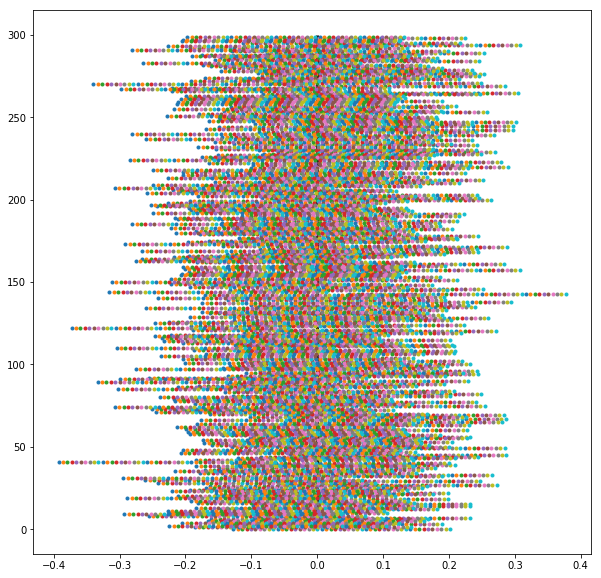

In [33]:
weave_plot(2000000, 200, 300, 0.99)